In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.manifold import TSNE

In [4]:
df = pd.read_parquet('data/encoded_data/GRUv3_std_tails/mu_d2_epoch_140.parquet')
preds_df = pd.read_csv('results/SVC_tails_140_12-50-54_14-23-21/latent_vectors.csv')

activity = df['label'].to_numpy()
d2_numpy = df.drop(['label', 'smiles'], axis=1).to_numpy()
preds_numpy = preds_df.drop(['score', 'norm'], axis=1).to_numpy()

In [5]:
preds_numpy

array([[-0.47888201, -0.65202301,  1.53090267, ...,  1.4198502 ,
        -1.80632073, -2.47598915],
       [-0.63449794, -1.74600631,  0.32486536, ..., -0.18669586,
         0.6821349 ,  1.47330313],
       [-3.05093221, -1.5012291 ,  2.52377687, ..., -2.1332043 ,
         0.03671811,  2.27672895],
       ...,
       [ 1.41237469,  2.64355189,  2.05994138, ..., -3.56585286,
        -0.15978846, -3.14054251],
       [-0.13683933,  0.13335014, -2.18308585, ...,  2.36595622,
         0.82985697, -0.95642797],
       [ 0.61725517,  1.4411384 ,  1.44780774, ...,  0.22341958,
         1.03105797,  0.94220895]])

In [14]:
random_state = random.randint(0, 100000)
cat = np.concatenate((d2_numpy, preds_numpy), axis=0)
tsne = TSNE(n_components=2, random_state=random_state, perplexity=40, n_jobs=-1)
results = tsne.fit_transform(cat)

d2_df = pd.DataFrame((results[:len(d2_numpy)]), columns=['x', 'y'])
preds_df = pd.DataFrame((results[len(d2_numpy):]), columns=['x', 'y'])
d2_df['activity'] = activity
d2_df['activity'] = ['D2 active' if x == 1 else 'D2 inactive' for x in d2_df['activity']]

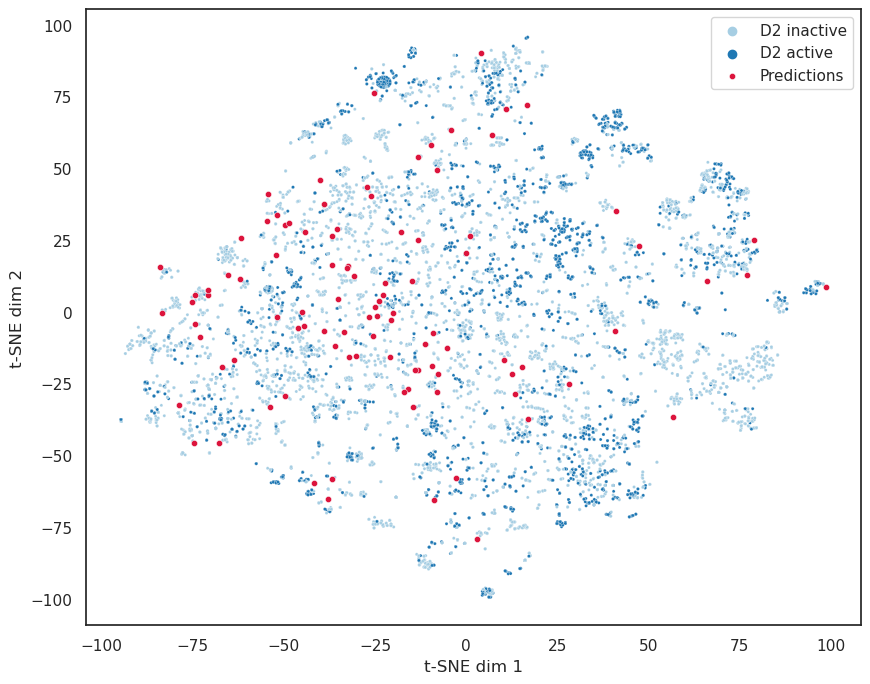

In [16]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style("white")
with sns.color_palette("Paired"):
    sns.scatterplot(
        data=d2_df,
        x="x", 
        y="y", 
        hue="activity", 
        s=5
    )
sns.scatterplot(
    data=preds_df,
    x="x", 
    y="y", 
    c='crimson', 
    s=20,
    label='Predictions'
)
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')

plt.legend()

plt.savefig(f'plots/GRUv3_std_tails_epoch_140_preds.png')
plt.show()